In [1]:
import os
os.chdir("..")

In [ ]:
os.getcwd()

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.test import (
    download_yolov5s6_model,
    Yolov5TestConstants
)
# download YOLOV5S6 model to 'tests/data/models/yolov5/yolov5s6.pt'
download_yolov5s6_model()

In [4]:
# import required functions, classes
from sahi.model import Yolov5DetectionModel
from sahi.utils.cv import read_image, visualize_object_predictions, ipython_display
from sahi.predict import get_prediction, get_sliced_prediction, predict

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [30]:
detection_model = Yolov5DetectionModel(
    model_path=Yolov5TestConstants.YOLOV5S6_MODEL_PATH,
    prediction_score_threshold=0.3,
    device="cuda", # or 'cpu'
)

- Load an image as a numpy array:

In [6]:
image_dir = "demo/demo_data/small-vehicles1.jpeg"
image = read_image(image_dir)

- Perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [31]:
result = get_prediction(image, detection_model)

- Visualize predicted bounding boxes and masks over the original image:

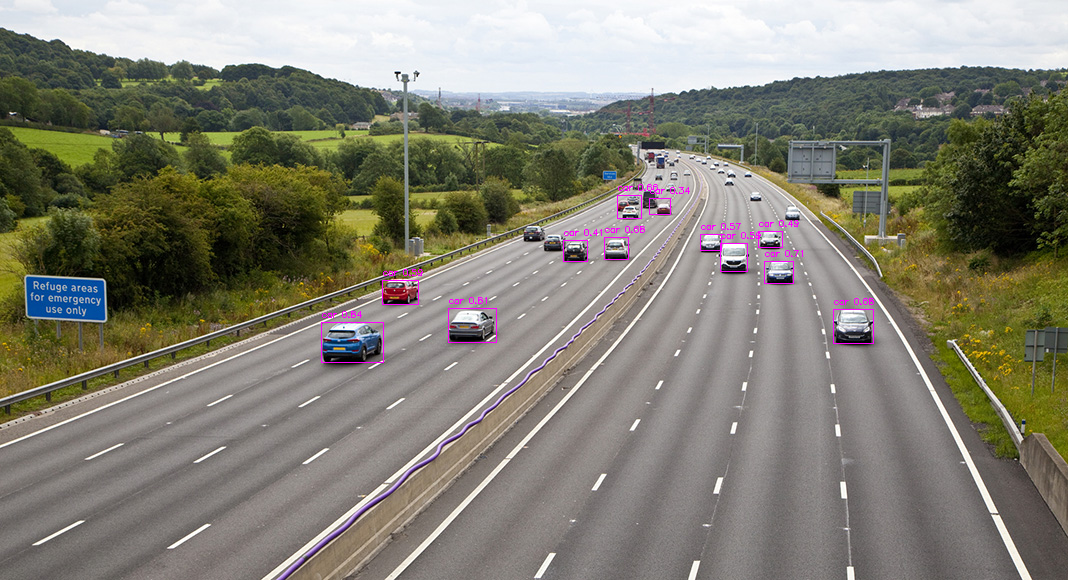

In [33]:
visualization_result = visualize_object_predictions(
    image,
    object_prediction_list=result["object_prediction_list"],
    output_dir=None,
    file_name=None,
)
ipython_display(visualization_result["image"])

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [17]:
result = get_sliced_prediction(
    image,
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Number of slices: 18


- Visualize predicted bounding boxes and masks over the original image:

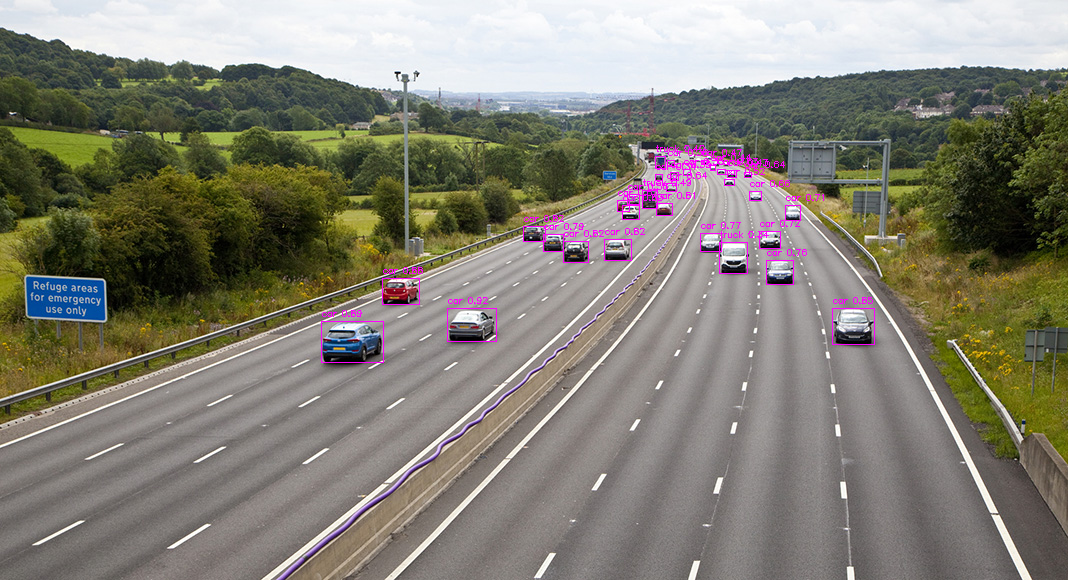

In [26]:
visualization_result = visualize_object_predictions(
    image,
    object_prediction_list=result["object_prediction_list"],
    output_dir=None,
    file_name=None,
)
ipython_display(visualization_result["image"])

## 3. Prediction Result

- Predictions are returned as a list of [sahi.prediction.ObjectPrediction](sahi/prediction.py):

In [34]:
object_prediction_list = result["object_prediction_list"]

In [36]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(749, 191, 761, 200), w: 12, h: 9>,
    mask: None,
    score: PredictionScore: <score: 0.66015625>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [37]:
object_prediction_list[0].to_coco_annotation()

CocoAnnotation<
    image_id: None,
    bbox: [749, 191, 12, 9],
    segmentation: [],
    category_id: 2,
    category_name: car,
    iscrowd: 0,
    area: 108>

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [38]:
object_prediction_list[0].to_coco_prediction().json

{'image_id': None,
 'bbox': [749, 191, 12, 9],
 'score': 0.66015625,
 'category_id': 2,
 'category_name': 'car',
 'segmentation': [],
 'iscrowd': 0,
 'area': 108}

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [35]:
object_prediction_list[0].to_imantics_annotation()

## 4. Batch Prediction

- Set model and directory parameters:

In [16]:
model_name = "Yolov5DetectionModel"
model_parameters = {
    "model_path": Yolov5TestConstants.YOLOV5S6_MODEL_PATH,
    "device": "cuda",
    "prediction_score_threshold":0.4,
}
apply_sliced_prediction = True
slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo/demo_data/"

- Perform sliced inference on given folder:

In [17]:
predict(
    model_name=model_name,
    model_parameters=model_parameters,
    source=source_image_dir,
    apply_sliced_prediction=apply_sliced_prediction,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 2 listed files in folder .
Use load_from_local loader


  0%|          | 0/2 [00:00<?, ?it/s]

Number of slices: 20


 50%|█████     | 1/2 [00:02<00:02,  2.33s/it]

Number of slices: 18


100%|██████████| 2/2 [00:04<00:00,  2.37s/it]

Model loaded in 0.9775676727294922 seconds.
Slicing performed in 0.00495457649230957 seconds.
Prediction performed in 4.52738094329834 seconds.
Exporting performed in 0.11608457565307617 seconds.
